# Interest Rate Analysis

This notebook analyzes the historical trends and relationships between different interest rates:
- Federal Funds Rate
- 1-Year Treasury Rate
- 10-Year Treasury Rate

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [11]:
# Load the cleaned datasets
fed_funds = pd.read_csv('cleaned_Federal_Funds_Rate.csv')
treasury_1y = pd.read_csv('cleaned_1_Year_Treasury_Rate.csv')
treasury_10y = pd.read_csv('cleaned_10_Year_Treasury_Rate.csv')

# Convert date columns to datetime
fed_funds['Date'] = pd.to_datetime(fed_funds['Original_Value'])
treasury_1y['Date'] = pd.to_datetime(treasury_1y['Original_Value'])
treasury_10y['Date'] = pd.to_datetime(treasury_10y['Original_Value'])

# Set Date as index
fed_funds.set_index('Date', inplace=True)
treasury_1y.set_index('Date', inplace=True)
treasury_10y.set_index('Date', inplace=True)

## Descriptive Statistics

In [13]:
# Calculate summary statistics
print("Federal Funds Rate Summary:")
print(fed_funds['Rate'].describe())
print("1-Year Treasury Rate Summary:")
print(treasury_1y['Rate'].describe())
print("10-Year Treasury Rate Summary:")
print(treasury_10y['Rate'].describe())

Federal Funds Rate Summary:
count    121.000000
mean       1.803636
std        1.879812
min        0.050000
25%        0.130000
50%        1.160000
75%        2.410000
max        5.330000
Name: Rate, dtype: float64
1-Year Treasury Rate Summary:
count    121.000000
mean       1.974876
std        1.793700
min        0.050000
25%        0.370000
50%        1.530000
75%        3.020000
max        5.440000
Name: Rate, dtype: float64
10-Year Treasury Rate Summary:
count    121.000000
mean       2.499339
std        1.065411
min        0.620000
25%        1.760000
50%        2.320000
75%        3.140000
max        4.800000
Name: Rate, dtype: float64


## Time Series Visualization

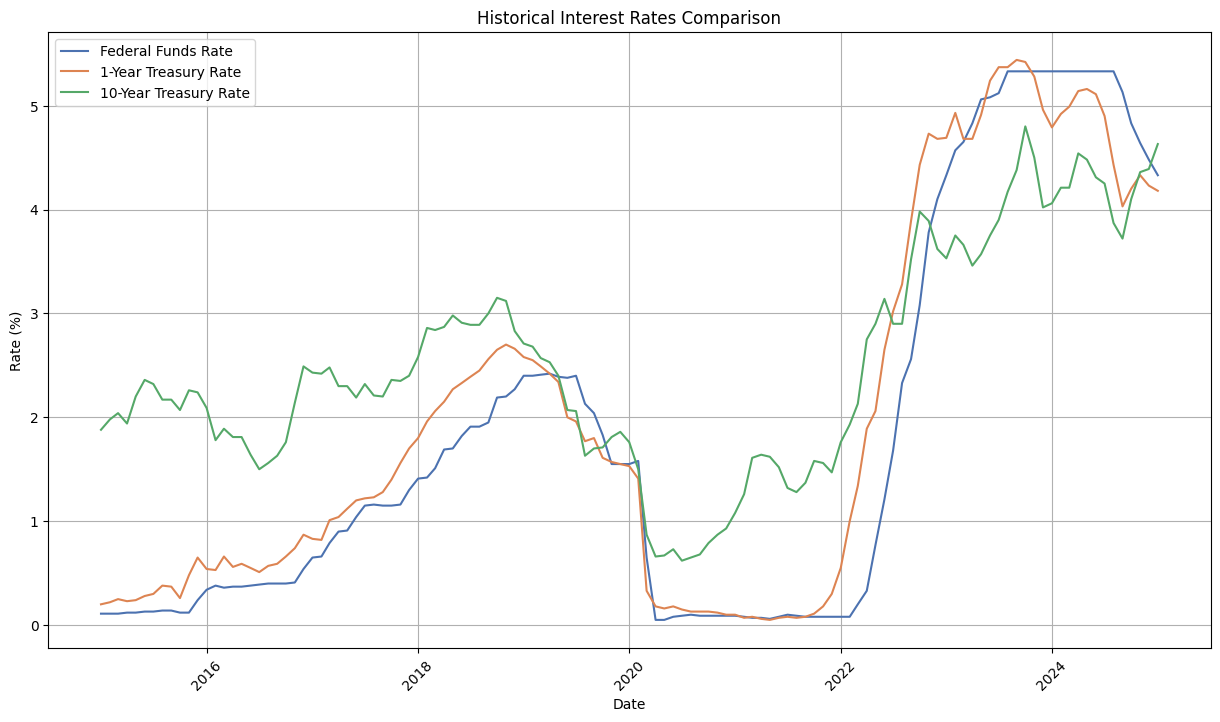

In [15]:
plt.figure(figsize=(15, 8))

# Plot all three rates
plt.plot(fed_funds.index, fed_funds['Rate'], label='Federal Funds Rate')
plt.plot(treasury_1y.index, treasury_1y['Rate'], label='1-Year Treasury Rate')
plt.plot(treasury_10y.index, treasury_10y['Rate'], label='10-Year Treasury Rate')

plt.title('Historical Interest Rates Comparison')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot
plt.savefig('interest_rates_comparison.png', bbox_inches='tight')
plt.show()

## Correlation Analysis

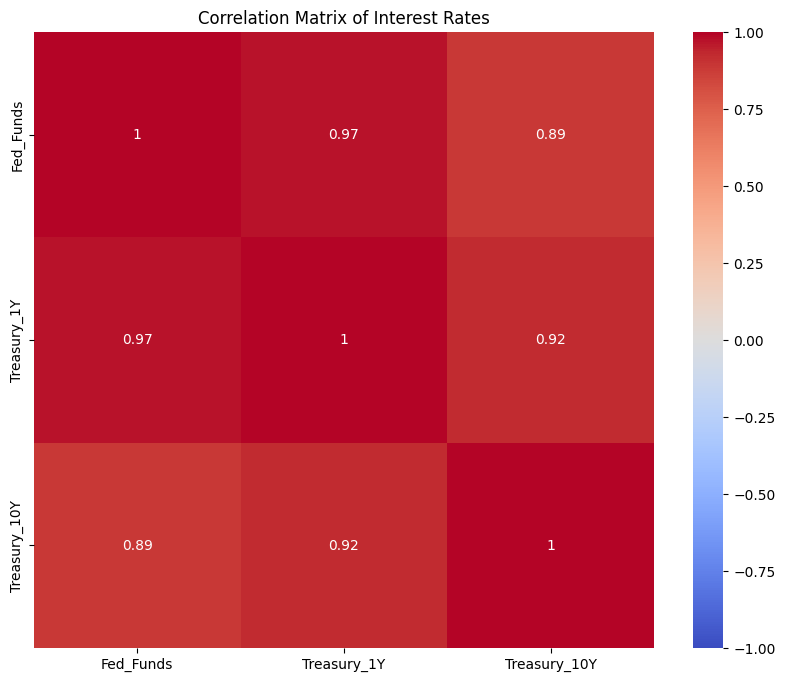

In [16]:
# Merge datasets on date index
merged_rates = pd.concat([
    fed_funds['Rate'].rename('Fed_Funds'),
    treasury_1y['Rate'].rename('Treasury_1Y'),
    treasury_10y['Rate'].rename('Treasury_10Y')
], axis=1)

# Calculate correlation matrix
correlation_matrix = merged_rates.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Interest Rates')
plt.show()

## Statistical Analysis

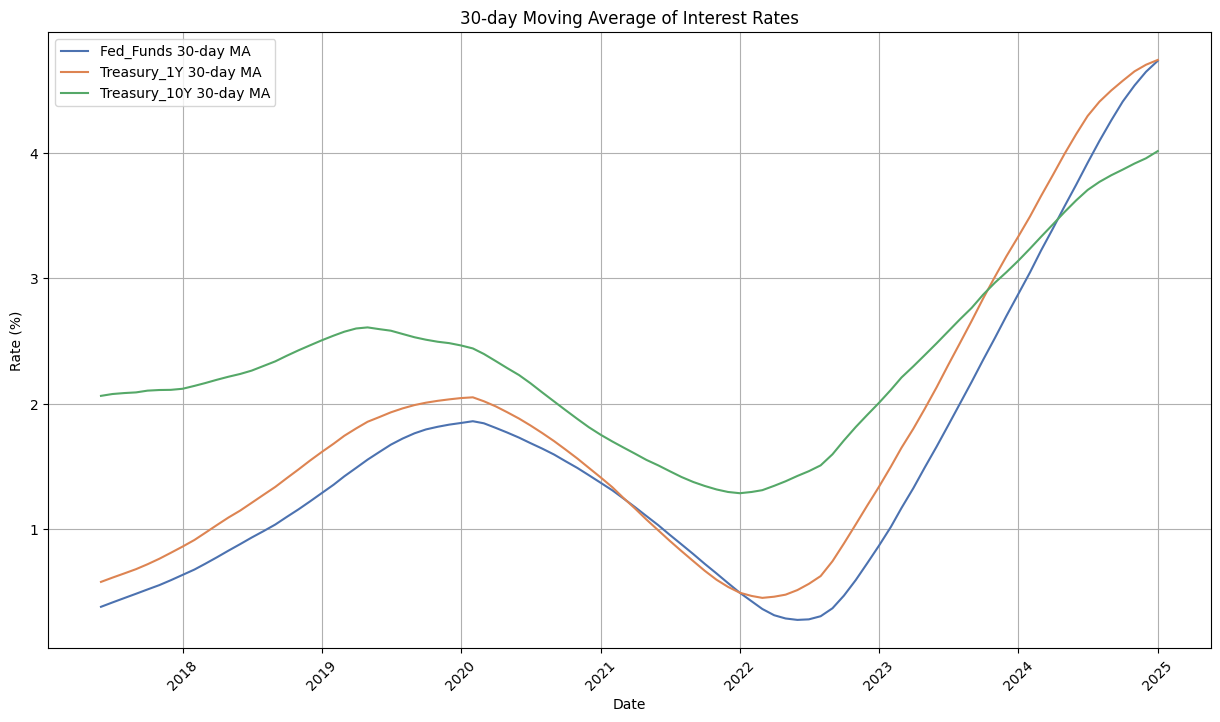

In [17]:
# Calculate rolling averages
window = 30  # 30-day rolling average

rolling_means = pd.DataFrame({
    'Fed_Funds': fed_funds['Rate'].rolling(window).mean(),
    'Treasury_1Y': treasury_1y['Rate'].rolling(window).mean(),
    'Treasury_10Y': treasury_10y['Rate'].rolling(window).mean()
})

plt.figure(figsize=(15, 8))
for column in rolling_means.columns:
    plt.plot(rolling_means.index, rolling_means[column], label=f'{column} {window}-day MA')

plt.title(f'{window}-day Moving Average of Interest Rates')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()